In [63]:
import numpy as np
import matplotlib.pyplot as plt

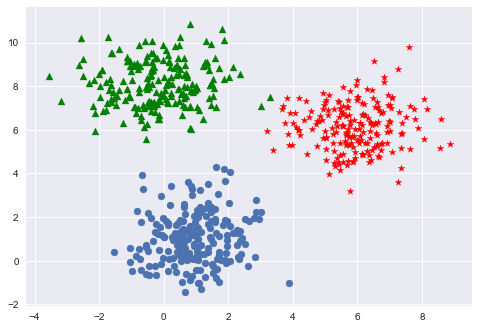

(200, 2)


In [68]:
size = 200

mean_1 = np.array([1, 1])
cov_1 = np.array([[1, 0.1], [0.1, 1.2]])

mean_2 = np.array([6, 6])
cov_2 = np.array([[1.2, 0.1], [0.1, 1]])

mean_3 = np.array([0, 8])
cov_3 = np.array([[1.2, 0.1], [0.1, 1]])

dist_1 = np.random.multivariate_normal(mean_1, cov_1, size)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size)
dist_3 = np.random.multivariate_normal(mean_3, cov_3, size)

plt.scatter(dist_1[:,0],dist_1[:,1])
plt.scatter(dist_2[:,0],dist_2[:,1], marker = '*', c = 'red')
plt.scatter(dist_3[:,0],dist_3[:,1], marker = '^', c = 'green')

plt.style.use('seaborn')

plt.show()
print(dist_1.shape)

In [69]:
data = np.zeros((size * 3, 3))
print(data.shape)

data[:size, :2] = dist_1
data[size:size * 2, :2] = dist_2
data[size * 2:, :2] = dist_3
data = np.array(data)

(600, 3)


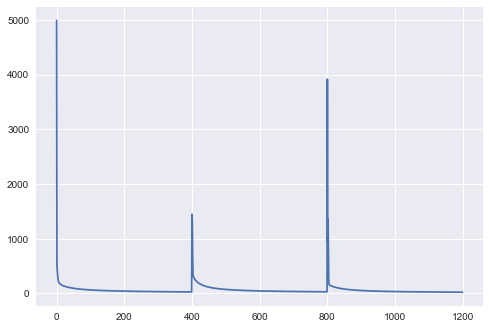

23.526738044930557


array([[-0.41891415, -1.39192062],
       [ 1.78448294,  0.0520878 ],
       [-1.66179967,  1.24887376]])

In [70]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)


def sigmoid(z):
    return 1/(1 + np.exp(-1*z))


def error(y, x, w, b):
    m = x.shape[0]
    err = 0
    for i in range(m):
        
        hx = hypothesis(x[i], w, b)
        err += y[i] * np.log2(hx) + (1 - y[i]) * np.log2(1 - hx)

    return -err


def get_grads(y, x, w, b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        
        grad_w += (y[i] - hx) * x[i]
        grad_b += (y[i] - hx)
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]

def grad_descent(x, y, w, b, learning_rate):
    
    err = error(y, x, w, b)
    [grad_w, grad_b] = get_grads(y, x, w, b)
    
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    
    return err, w, b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence < 0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

err = []
acc = []

ww = []
bb = []

for j in range(3):
    
    w = np.random.random((2, ))
    b = np.random.random()
    
    data2 = list(data)
    data2 = np.array(data2)
    
    data2[size * j:size * (j + 1), -1] = 1
    np.random.shuffle(data2)
    
    X_train = data2[:,:-1]
    Y_train = data2[:,-1]
    
    for i in range(400):
        e, w, b = grad_descent(X_train, Y_train, w, b, learning_rate = 0.5)
        err.append(e) 

    ww.append(w)
    bb.append(b)
    
plt.plot(err)
plt.show()
print(err[-1])

ww = np.array(ww)
ww.reshape(3,2)

(3, 2)


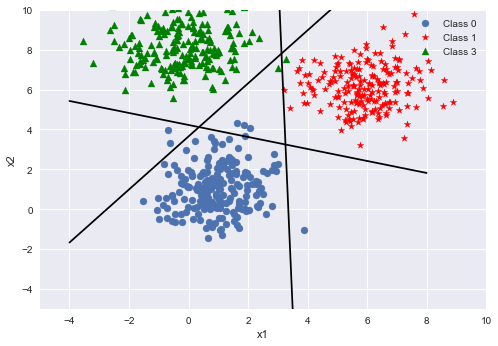

In [71]:
ww = np.array(ww)
print(ww.shape)

plt.figure(0)

plt.scatter(dist_1[:,0],dist_1[:,1],label='Class 0')
plt.scatter(dist_2[:,0],dist_2[:,1],color='r',marker='*',label='Class 1')
plt.scatter(dist_3[:,0],dist_3[:,1],color='g',marker='^',label='Class 3')

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(ww[0][0]*x + bb[0])/ww[0][1]
plt.plot(x,y,color='k')

x = np.linspace(-4,8,10)
y = -(ww[1][0]*x + bb[1])/ww[1][1]
plt.plot(x,y,color='k')

x = np.linspace(-4,8,10)
y = -(ww[2][0]*x + bb[2])/ww[2][1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()